In [1]:
#importing pandas,numpy,maytplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing test dataset
test=pd.read_csv('test.csv')

In [3]:
#checking no.of rows and columns of test
test.shape

(2556790, 6)

In [4]:
#importing train dataset
train=pd.read_csv('train.csv')

In [5]:
#checking no.of rows and columns of train
train.shape

(7377418, 6)

In [6]:
#importing members dataset
members=pd.read_csv('members.csv')

In [7]:
#checking no.of rows and columns of members
members.shape

(34403, 7)

In [8]:
#importing songs dataset
songs=pd.read_csv('songs.csv')

In [9]:
#checking no.of rows and columns of songs
songs.shape

(2296320, 7)

In [10]:
#importing song_extra_info dataset
extra_info=pd.read_csv('song_extra_info.csv')

In [11]:
#checking no.of rows and columns of song_extra_info
extra_info.shape

(2295971, 3)

In [12]:
#test columns
test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')

In [13]:
#train columns
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [14]:
#songs column
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [15]:
#dropping id column
test=test.drop('id',axis=1)

In [16]:
#adding target variable
test['target']='test'

In [17]:
#test columns
test.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [18]:
#combining test and train
train=pd.concat([test,train],axis=0)

In [19]:
#train columns
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [20]:
#shape
train.shape

(9934208, 6)

In [21]:
#merging the train and songs dataset using left outer join and song_id column
train=train.merge(songs,how='left',on='song_id')

In [22]:
#train rows and columns
train.shape

(9934208, 12)

In [23]:
#song_extra_info columns
extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [24]:
#merging the train and song_extra_info dataset 
#using left outer join and song_id column
train=train.merge(extra_info,how='left',on='song_id')

In [25]:
#checking no.of rows and columns of train
train.shape

(9934208, 14)

In [26]:
#train columns
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'isrc'],
      dtype='object')

In [27]:
#member columns
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [28]:
#merging the train and members data
train=train.merge(members,how='left',on='msno')

In [29]:
#checking no.of rows and columns of train
train.shape

(9934208, 20)

In [30]:
#datatypes
train.dtypes

msno                       object
song_id                    object
source_system_tab          object
source_screen_name         object
source_type                object
target                     object
song_length               float64
genre_ids                  object
artist_name                object
composer                   object
lyricist                   object
language                  float64
name                       object
isrc                       object
city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time      int64
expiration_date             int64
dtype: object

In [31]:
#dividing object and numeric columns
obj=train.select_dtypes(include=['object'])
numeric=train.select_dtypes(include=np.number)

In [32]:
#checking no.of rows and columns
print(obj.shape)
numeric.shape

(9934208, 13)


(9934208, 7)

In [33]:
#checking null values of obj
obj.isnull().sum().sort_values(ascending=False)

lyricist              4403542
gender                4013703
composer              2295010
isrc                   774501
source_screen_name     577687
genre_ids              160565
source_system_tab       33291
source_type             28836
name                     2235
artist_name               139
target                      0
song_id                     0
msno                        0
dtype: int64

In [34]:
#head
obj.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,artist_name,composer,lyricist,name,isrc,gender
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,test,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,愛其實很殘忍,TWUM71400047,NaN
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,test,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,她說,TWB671005201,NaN
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,test,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,subarashiki nichijo,JPWP01070260,NaN
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,test,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,male
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,test,873,Yoga Mr Sound,Neuromancer,NaN,Om Yoga,ITO101121898,male


In [35]:
#tail
obj.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,artist_name,composer,lyricist,name,isrc,gender
9934203,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,1259,Dr. Dre,Andre R. Young| Melvin Charles Bradford| Shawn...,NaN,Still D.R.E.,USIR19905031,female
9934204,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Locked Away,USRC11501369,NaN
9934205,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,FLY OUT,TWA451512031,NaN
9934206,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,2122,Brad Mehldau Trio,NaN,NaN,Wonderwall,USNO10750721,NaN
9934207,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,Ju0VGkjWeBUZCd7r5Az2hUImhMoWxWLUicOedsmvG0g=,discover,Discover Genre,online-playlist,1,212,Biréli Lagrène| Sylvain Luc,Robert Andrew Hyman| Cyndy Lauper,Robert Andrew Hyman| Cyndy Lauper,Time after time,FR14F9900090,NaN


In [36]:
#columns of obj
obj.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'name', 'isrc', 'gender'],
      dtype='object')

In [37]:
#dropping isrc variable
obj=obj.drop('isrc',axis=1)

In [38]:
#filling missing values of obj column
a=['source_system_tab','source_screen_name',
       'source_type','artist_name','composer','lyricist',
       'name','gender']
for i in a:
    obj[i]=obj[i].fillna('unknown')

In [39]:
#filling missing values of obj column
obj['genre_ids']=obj['genre_ids'].fillna('9999')

In [40]:
#again checking null values of obj column
obj.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
genre_ids             0
artist_name           0
composer              0
lyricist              0
name                  0
gender                0
dtype: int64

In [41]:
#checking null values of numeric column
numeric.isnull().sum().sort_values(ascending=False)

language                  192
song_length               139
expiration_date             0
registration_init_time      0
registered_via              0
bd                          0
city                        0
dtype: int64

In [42]:
#head
numeric.head()

,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
0,224130.0,3.0,1,0,7,20160219,20170918
1,320470.0,3.0,1,0,7,20160219,20170918
2,315899.0,17.0,1,0,4,20161117,20161124
3,285210.0,52.0,3,30,9,20070725,20170430
4,197590.0,-1.0,3,30,9,20070725,20170430


In [43]:
#tail
numeric.tail()

,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
9934203,267958.0,52.0,4,26,9,20041218,20170930
9934204,227404.0,52.0,1,0,7,20130627,20171006
9934205,258298.0,3.0,1,0,7,20130627,20171006
9934206,524146.0,52.0,5,0,9,20150213,20170918
9934207,254026.0,52.0,5,0,9,20150213,20170918


In [44]:
#filling missing values of numeric column
numeric['song_length']=numeric['song_length'].fillna(999999.9)
numeric['language']=numeric['language'].fillna(numeric['language'].value_counts().idxmax())
                                              

<ipython-input-44-9f21b766b7aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['song_length']=numeric['song_length'].fillna(999999.9)
<ipython-input-44-9f21b766b7aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['language']=numeric['language'].fillna(numeric['language'].value_counts().idxmax())


In [45]:
#again checking null values
numeric.isnull().sum()

song_length               0
language                  0
city                      0
bd                        0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [46]:
#dividing the categorical variables from numeric column
category=numeric[['language','city','bd','registered_via']]

In [47]:
#dropping categorical cols from numeric cols
numeric=numeric.drop(['language','city','bd','registered_via'],axis=1)

In [48]:
#numeric columns
numeric.columns

Index(['song_length', 'registration_init_time', 'expiration_date'], dtype='object')

In [49]:
#moving the target to numeric
numeric['target']=obj['target']

In [50]:
#dropping target from obj
obj=obj.drop('target',axis=1)

In [51]:
#importing labelencoder
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
#label encoder for obj cols 
objdummy=obj.apply(le.fit_transform)

In [54]:
#label encoder for category cols
categorydummy=category.apply(le.fit_transform)

<AxesSubplot:>

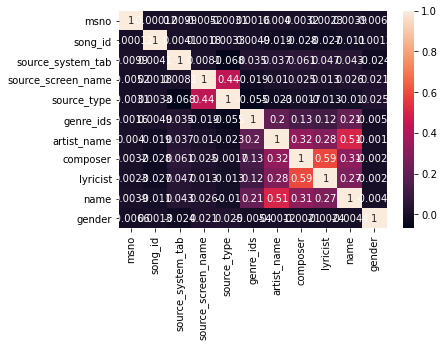

In [55]:
#heat map of objdummy
sns.heatmap(objdummy.corr(),annot=True)

<AxesSubplot:>

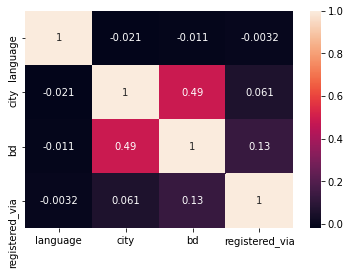

In [56]:
#heat map of categorydummy
sns.heatmap(categorydummy.corr(),annot=True)

<AxesSubplot:>

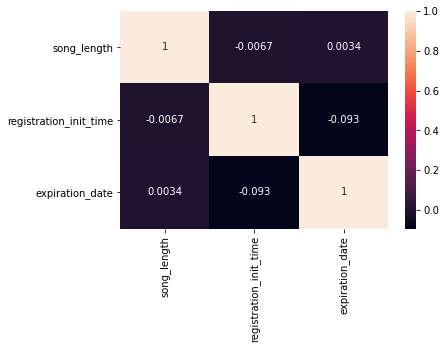

In [57]:
#heat map of numeric
sns.heatmap(numeric.corr(),annot=True)

In [58]:
#combining numeric,objdummy and categorydummy
combinedf=pd.concat([objdummy,categorydummy,numeric],axis=1)

In [59]:
#combinedf shape
combinedf.shape

(9934208, 19)

In [60]:
#head
combinedf.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,name,gender,language,city,bd,registered_via,song_length,registration_init_time,expiration_date,target
0,17724,228222,3,8,3,364,42813,56689,26123,224595,2,1,0,2,2,224130.0,20160219,20170918,test
1,17724,407039,3,8,3,371,42633,79914,29124,215070,2,1,0,2,2,320470.0,20160219,20170918,test
2,977,70211,0,22,9,200,38492,73206,25428,190935,2,3,0,2,1,315899.0,20161117,20161124,test
3,1878,419092,5,16,7,371,36423,67327,26123,67493,1,8,1,27,3,285210.0,20070725,20170430,test
4,1878,160096,5,16,7,519,38298,52438,26123,116287,1,0,1,27,3,197590.0,20070725,20170430,test


In [61]:
#tail
combinedf.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,name,gender,language,city,bd,registered_via,song_length,registration_init_time,expiration_date,target
9934203,4726,218734,3,8,4,97,10154,4024,26123,148815,0,8,2,23,3,267958.0,20041218,20170930,1
9934204,20402,413719,6,17,8,371,27703,67549,23375,94539,2,8,0,2,2,227404.0,20130627,20171006,0
9934205,20402,59992,6,17,8,371,40284,77325,28940,49846,2,1,0,2,2,258298.0,20130627,20171006,1
9934206,1371,119278,0,5,6,235,5081,74406,26123,183488,2,8,3,2,3,524146.0,20150213,20170918,1
9934207,1371,144048,0,5,6,234,4482,58915,20482,166604,2,8,3,2,3,254026.0,20150213,20170918,1


In [62]:
#dividing into testdf and traindf
testdf=combinedf[combinedf['target']=='test']
traindf=combinedf[combinedf['target']!='test']

In [63]:
#dropping target variable
testdf=testdf.drop('target',axis=1)

In [64]:
#rows and columns
testdf.shape

(2556790, 18)

In [65]:
#shape
traindf.shape

(7377418, 19)

In [66]:
#checking null hypothesis of target and song_length 
traindf.groupby(['target'])['song_length'].mean()

target
0    245257.700295
1    245009.315233
Name: song_length, dtype: float64

In [67]:
#dividing on basis of target
z=traindf[traindf['target']==0]
o=traindf[traindf['target']==1]

In [68]:
from scipy.stats import ttest_ind

In [69]:
ttest_ind(z['song_length'],o['song_length'],equal_var=False)
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the target and song_length

Ttest_indResult(statistic=4.998174659602112, pvalue=5.787691512581515e-07)

In [70]:
#test null hypothesis of target and gender
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(traindf['target'],traindf['gender']))
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the target and gender

(2682.7334076358648,
 0.0,
 2,
 array([[1051707.70434751, 1140730.56653778, 1470323.72911471],
        [1066608.29565249, 1156892.43346222, 1491155.27088529]]))

In [71]:
#test null hypothesis of registered_via and msno
traindf.groupby(['registered_via'])['msno'].mean()

registered_via
0    17251.819512
1    17284.028572
2    17298.307505
3    17218.402296
4    16190.884827
Name: msno, dtype: float64

In [72]:
#dividing on basis of registered_via
z=traindf[traindf['registered_via']==0]
o=traindf[traindf['registered_via']==1]
t=traindf[traindf['registered_via']==2]
th=traindf[traindf['registered_via']==3]
f=traindf[traindf['registered_via']==4]

In [73]:
from scipy.stats import f_oneway
f_oneway(z['msno'],o['msno'],t['msno'],th['msno'],f['msno'])
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the registered_via and msno

F_onewayResult(statistic=66.54023563935003, pvalue=2.1492067944651666e-56)

In [74]:
#dividing independent and dependent variables
y=traindf['target']
X=traindf.drop('target',axis=1)

In [75]:
#label encoding of y
y=le.fit_transform(y)

In [76]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [77]:
lr=LogisticRegression(max_iter=3000)

In [79]:
lrmodel=lr.fit(X,y)

In [80]:
lrmodel.score(X,y)#r-square

0.5186689977441973

In [81]:
lrpredict=lrmodel.predict(testdf)

In [82]:
lrpredict1=lrmodel.predict(X)

In [83]:
pd.DataFrame(lrpredict).to_csv('lrpredict.csv')

In [84]:
pd.crosstab(y,lrpredict1)

col_0,0,1
row_0,,
0,1264288,2398474
1,1152506,2562150


In [85]:
from sklearn.metrics import plot_roc_curve

In [86]:
from sklearn.metrics import classification_report

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
np.mean(cross_val_score(lr,X,y,cv=2))

0.5185643540870262

In [89]:
print(classification_report(y,lrpredict1))

              precision    recall  f1-score   support

           0       0.52      0.35      0.42   3662762
           1       0.52      0.69      0.59   3714656

    accuracy                           0.52   7377418
   macro avg       0.52      0.52      0.50   7377418
weighted avg       0.52      0.52      0.50   7377418



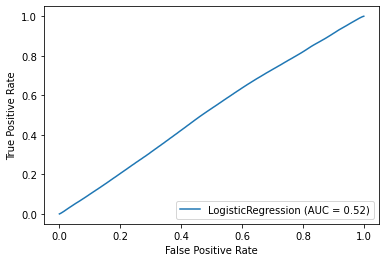

In [90]:
plot_roc_curve(lr,X,y)

In [91]:
from sklearn.tree import DecisionTreeClassifier 

In [92]:
dt=DecisionTreeClassifier(max_depth=3)

In [93]:
dtmodel=dt.fit(X,y)

In [94]:
dtmodel.score(X,y)#R-Square

0.6243691220966469

In [95]:
dtpredict=dtmodel.predict(testdf)

In [96]:
pd.DataFrame(dtpredict).to_csv('dtpredict.csv')

In [97]:
dtpredict1=dtmodel.predict(X)

In [98]:
pd.crosstab(y,dtpredict1)

col_0,0,1
row_0,,
0,2493198,1169564
1,1601622,2113034


In [99]:
np.mean(cross_val_score(dt,X,y,cv=2))

0.6236019160090969

In [100]:
print(classification_report(y,dtpredict1))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64   3662762
           1       0.64      0.57      0.60   3714656

    accuracy                           0.62   7377418
   macro avg       0.63      0.62      0.62   7377418
weighted avg       0.63      0.62      0.62   7377418



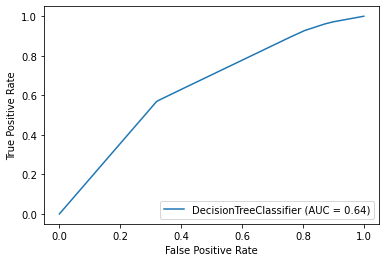

In [170]:
plot_roc_curve(dt,X,y)

In [174]:
#among the above models the average accuracy of decision tree is more.
#so we prefer the decision tree classifier for predicting
#the music recomendation